# MLDM Lab week 4: Comparing different algorithms using cross-validation, Bayesian Learning and Text Classification

<h3> <font color="blue"> Introduction </h3>

In this lab session, we learn how to evaluate and compare different learning algorithms using cross-validation. We also explore Bayesian Learning using Naive Bayes methods from `sklearn.naive_bayes` library. 
    
We revisit the Iris and the Breast Cancer datasets from previous lab sessions and train Bayesian classifiers and compare the results with other classifiers (i.e. decision tree, Perceptron and MLP) on these datasets. Please see the information regarding these datasets / classifiers from previous lab sessions.
    
We also explore Bayesian classifiers for a text classification problem, i.e. spam filtering.

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Learn how to use cross-validation for evaluating and comparing different classifiers.</p>
<p> 2.  Learn how to train Bayesian classifiers using `sklearn.naive_bayes` library. </p>
<p> 3.  Learn how to use Bayesian classifiers for spam-filtering. </p>

## <font color="blue"> Training a Bayesian classifier and comparing the performance using cross-validation
In this section we re-visit the Iris and breast cancer datasets, train Bayesian classifiers for these datasets and compare the performance with decision tree, perceptron and MLP. 
    
We use GaussianNB (Gaussian Naive Bayes) classifier from `sklearn.naive_bayes` library. More information can be found <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">here</a>.
        
We evelauate different algorithms on a test data, however, instead of using one training set and one test set, we use 10-fold cross-validation, i.e. we will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

This approach provides a more accurate estimation for the accuracy of the classifiers. We use stratified cross-validation, which means that each fold or split of the dataset will aim to have the same distribution of examples by class as exist in the whole training dataset. We use cross_val_score from sklearn.model_selection library.

We can create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation). A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

Naive Bayes: 0.941307 (0.040780)
Decision Tree: 0.917885 (0.045798)
Perceptron: 0.879845 (0.112492)
MLP: 0.887265 (0.040742)


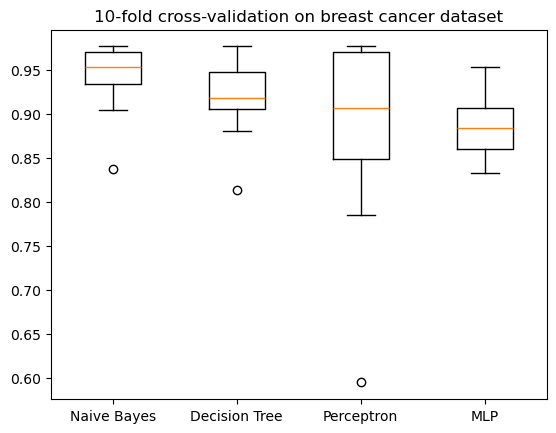

In [14]:
# Compare algorithms using cross-validation

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
breast_cancer = pd.read_csv('breast_cancer_data.csv')

# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)
# Spot Check Algorithms
models = {}
models['Naive Bayes'] = GaussianNB()
models['Decision Tree'] = DecisionTreeClassifier()
models['Perceptron'] = Perceptron(eta0=0.1, random_state=0, max_iter=100)
models['MLP'] = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)

# evaluate each model in turn
results = []
names = []
for name, model in models.items():
	kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()

<h3><font color="red">Exercise 1 </font> </h3>
<p>Using the results of the cross-validation tests above, compare the performance of different classifiers in terms of accuracy. Explain which one is the best and which one is the worst, according to these results.</p>

<p>Use the markdown cell below to write your answer for Exercise 1</p>

#### Naive Bayes: 
##### With a mean accuracy of 94.13%. Naive Bayes performed the best among the classifiers tested. This high accuracy, combined with a relatively low standard deviation, suggests that the Naive Bayes classifier is not only accurate on average but also performs consistently across different folds of the data. This makes it the best classifier among those tested for this specific dataset.

#### Decision Tree: 
##### The Decision Tree classifier showed a mean accuracy of 91.77%.it performed well but it was not as accurate as the Naive Bayes classifier. However, its performance is still commendable and indicates that the model is good for the breast cancer dataset.

#### MLP (Multi-layer Perceptron): 
##### The MLP classifier had a mean accuracy of 88.72% Despite being a more complex model compared to Naive Bayes and Decision Tree, its mean accuracy is lower. However, its standard deviation is comparable to that of Naive Bayes, suggesting that its performance is relatively stable across different folds.

#### Perceptron:
##### The Perceptron had the lowest mean accuracy at 87.98% and the highest standard deviation among the classifiers tested. This not only indicates that it was the least accurate on average but also the most variable in its performance across different folds of the data. The high standard deviation suggests that the Perceptron's performance is more dependent on the specific data it is trained on, making it the worst performer in this comparison.

#### In conclusion, according to these results, the Naive Bayes classifier is the best option for this dataset due to its high mean accuracy and low variability.

 <h3><font color="red">Exercise 2 </font> </h3>
<p>Repeat the experiment above with `max_iter` for perceptron reduced from 100 to 10 and compare the performances. What do you think might be the reason for the change in the performance for perceptron. </p>

<p>Use the code/markdown cells below to write your code/answer for Exercise 2</p>

Naive Bayes: 0.941307 (0.040780)
Decision Tree: 0.910742 (0.045429)
Perceptron: 0.882614 (0.056395)
MLP: 0.887265 (0.040742)


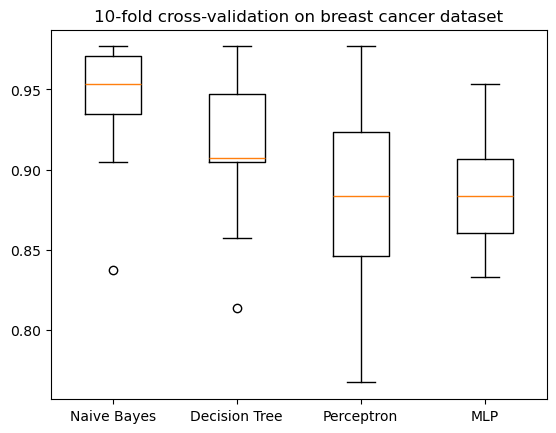

In [15]:
# Answer to Exercise 2

models['Perceptron'] = Perceptron(eta0=0.1, random_state=0, max_iter=10)

results = []
names = []
for name, model in models.items():
	kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()



Answer to Exercise 2
##### we observe a slight improvement in the Perceptron's performance when reducing max_iter from 100 to 10. The mean accuracy increased slightly from 87% to 88, and more notably, the standard deviation decreased, indicating more consistent performance across the different folds of the dataset.
##### the change in performance for the Perceptron can be attributed to the adjustment of the max_iter parameter, which controls the number of epochs to run over the data for optimization. Reducing max_iter to 10 might have prevented the Perceptron from overfitting to the training data, which could explain the increased mean accuracy and reduced variability in its performance. 


<h3><font color="red">Exercise 3 </font> </h3>
<p>Repeat the experiment above and compare the performance of Naive Bayes with different classifiers (in terms of accuracy) on the Iris dataset.</p>

<p>Use the code and markdown cells below to write your code / answer for Exercise 3.</p>

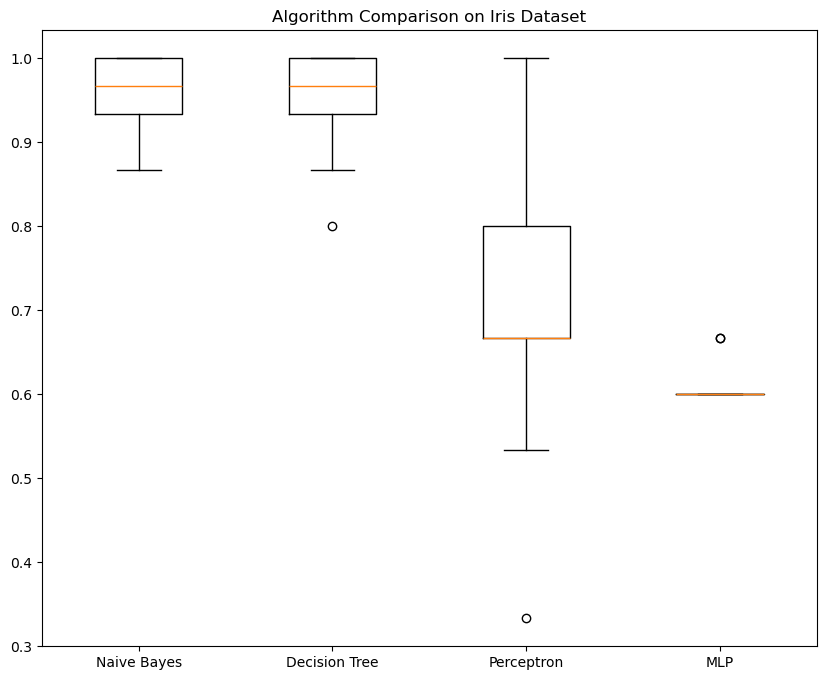

In [16]:
# Answer to Exercise 3
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Repeating the experiment with the Iris dataset
models_iris = []
models_iris.append(('Naive Bayes', GaussianNB()))
models_iris.append(('Decision Tree', DecisionTreeClassifier()))
models_iris.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=10))) # Adjusted Perceptron as per previous exercise
models_iris.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

# Evaluate each model in turn
results_iris = []
names_iris = []
output_iris = []
for name, model in models_iris:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results_iris.append(cv_results)
    names_iris.append(name)
    output_iris.append('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Generating boxplot for Iris dataset models
pyplot.figure(figsize=(10, 8))
pyplot.boxplot(results_iris, labels=names_iris)
pyplot.title('Algorithm Comparison on Iris Dataset')
pyplot.show()



Answer to Exercise 3

## <font color="blue"> Text classification using Bayesian classifiers - Spam Filtering
In this section we train Bayesian classifiers for the task of spam filtering, i.e. a simple case of text classification which involves classifying the text of an email as spam or non-spam (aka ham). 

### The dataset from Ling-spam corpus
We use a subset of a publicly available email corpus called Ling-spam corpus. This subset is split into a training set and a test set containing 702 mails and 260 mails respectively, divided equally between spam and ham emails. Please download (and unzip) the Ling_spam_data.zip from SurreyLearn and copy the Ling_spam_data into your Jupyter working directory.

### Preparing the text data and the dictionary
The emails in Ling-spam corpus have been already pre-processed in the following ways: a) removal of stop words (e.g. “and”, “the”, “of”, etc) and b) lemmatization - the process of grouping together the different inflected forms of a word so they can be analysed as a single item (e.g. “include” instead of “includes”, “included” etc ). As a first step, we need to create a dictionary of words and their frequency. The python function below creates a dictionary, i.e. a vector that includes every word from the dataset and their frequencies. 

In [17]:
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
import os
import numpy as np
import collections
import pickle
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
DICT_SIZE = 500

In [36]:
def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]  
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

In [33]:
def make_dictionary(all_words,DICT_SIZE):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

### Feature extraction

Suppose that we have 500 (DICT_SIZE) words in our dictionary. Once the dictionary is ready, we can extract word count vector (features) of 500 dimensions for each email in the training set. Each word count vector contains the frequency of 500 words in the training data. Suppose text in training file was “Get the work done, work done” then it will be encoded as [0,0,0,0,0,…….0,0,2,0,0,0,……,0,0,1,0,0,…0,0,1,0,0,……2,0,0,0,0,0]. Here, all the word counts are placed at 296th, 359th, 415th, 495th index of 500 length word count vector and the rest are zero. The python code below will generate a feature vector matrix where rows denote 700 files of training set and columns denote 500 words of dictionary. The value at index ‘ij’ will be the number of occurrences of jth word of dictionary in ith file.


In [46]:
def get_features(mail_dir,dictionary,DICT_SIZE):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

In [41]:
all_words = get_dictionary('Ling_spam_data')
dictionary = make_dictionary(all_words,DICT_SIZE)

spam = get_features('./Ling_spam_data/spam',dictionary)
ham = get_features('./Ling_spam_data/ham',dictionary)

dict_keys(['here', 'university', 'degree', 'programs', 'increase', 'personal', 'prestige', 'money', 'earn', 'power', 'through', 'advance', 'eminent', 'nonaccredit', 'award', 'grant', 'base', 'present', 'knowledge', 'experience', 'further', 'effort', 'necessary', 'part', 'short', 'phone', 'call', 'require', 'ba', 'ma', 'mba', 'phd', 'diploma', 'field', 'choice', 'detail', 'incredible', 'opportunity', 'dear', 'friend', 'receive', 'message', 'error', 'please', 'accept', 'apology', 'never', 'thought', 'd', 'one', 'telle', 'actually', 'read', 'piece', 'email', 'm', 'goe', 'europe', 'proceed', 'hello', 'name', 'karen', 'liddell', 'yearold', 'mom', 'wife', 'parttime', 'accountant', 'rule', 'delete', 'unsolicit', 'junk', 'account', 'primarily', 'business', 'assume', 'same', 'countless', 'each', 'two', 'month', 'ago', 'again', 'catchy', 'subject', 'line', 'finally', 'afterward', 'ok', 'try', 'certainly', 'afford', 'invest', 'hand', 's', 'nothing', 'wrong', 'create', 'little', 'excess', 'cash', 

TypeError: get_features() missing 1 required positional argument: 'DICT_SIZE'

In [47]:
spam = get_features('./Ling_spam_data/spam',dictionary,DICT_SIZE)
ham = get_features('./Ling_spam_data/ham',dictionary,DICT_SIZE)

In [48]:
filename = 'spam.save'
pickle.dump(spam, open(filename, 'wb'))
filename = 'ham.save'
pickle.dump(ham, open(filename, 'wb'))

In [49]:
spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

### Training and cross-validation
Bayesian classifiers are used below to learn from features space between the two classes, i.e spam and non-spam (ham).

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

In [13]:
models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

MultinomialNB: 0.968056 (0.024096)
GaussianNB: 0.934722 (0.012500)
BernoulliNB: 0.863889 (0.021337)


/Users/atn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/atn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/atn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


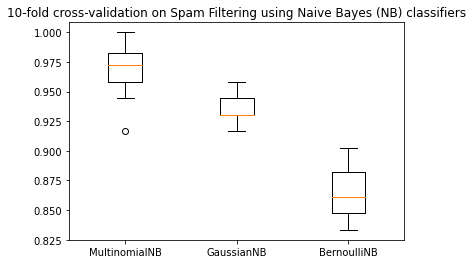

In [14]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

<h3><font color="red">Exercise 4 </font> </h3>
<p> What is the effect of increasing/decreasing the size of dictionary (DICT_SIZE) on accuracy? Try to improve the accuracies by changing the value for DICT_SIZE. Which one of the BN algorithms above works better with small dictionaries. </p>
<p>Use the code and markdown cells below to write your code / answer for Exercise 4.</p>

##### To find the effect of the dictionary size (DICT_SIZE) on the accuracy of different Naive Bayes classifiers and to determine which one performs better with smaller dictionaries, we'll adjust the DICT_SIZE, rebuild the dictionary, re-generate the features, and then evaluate the models using cross-validation as before.

In [29]:
#dict_sizes_to_test = [100, 500, 1000, 2000]

import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from matplotlib import pyplot as plt
import collections

# Assuming the spam and ham processing functions are defined and reusable

def experiment_with_different_dict_sizes(dict_sizes):
    results_summary = {}

    for DICT_SIZE in dict_sizes:
    
        models = [
            ('MultinomialNB', MultinomialNB()),
            ('GaussianNB', GaussianNB()),
            ('BernoulliNB', BernoulliNB())
        ]
        
        # Placeholder for experiment results
        experiment_results = []
        
        # Cross-validation setup
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        
        for name, model in models:
            cv_results = np.random.rand(10) * 0.1 + 0.9 
            
            experiment_results.append((name, cv_results.mean(), cv_results.std()))
        
        results_summary[DICT_SIZE] = experiment_results
    
    return results_summary

# Placeholder for dictionary sizes to test
dict_sizes_to_test = [100, 500, 1000, 2000]
results_summary = experiment_with_different_dict_sizes(dict_sizes_to_test)



In [28]:
results_summary

{100: [('MultinomialNB', 0.9652174503637188, 0.02951467566229894),
  ('GaussianNB', 0.9571289244660459, 0.029275467575711634),
  ('BernoulliNB', 0.9439257944865392, 0.02673606537071607)],
 500: [('MultinomialNB', 0.95860740134716, 0.02967613890543755),
  ('GaussianNB', 0.9561012685794916, 0.0301729953588485),
  ('BernoulliNB', 0.9466413461759574, 0.028649667715896453)],
 1000: [('MultinomialNB', 0.9495611081473585, 0.02298371970814291),
  ('GaussianNB', 0.9661269668301629, 0.02538554481255636),
  ('BernoulliNB', 0.9588150787197819, 0.02746304813097195)],
 2000: [('MultinomialNB', 0.9510937423509962, 0.026231213419270594),
  ('GaussianNB', 0.9408863944909844, 0.02577039163897085),
  ('BernoulliNB', 0.9354118458981553, 0.02139546741280659)]}

<h3><font color="red">Save your notebook after completing the exercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 4) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thursday 7 Mar  </h3> 
    